In [1]:
import os

In [2]:
import gdal

In [3]:
import numpy as np

In [4]:
import cv2

In [5]:
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt
import rasterio

In [6]:
from glob import glob

In [7]:
dec = os.getcwd() + "\\dec"
dec_file = glob(dec+"\\*.tif")[0]
dec_file

'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\ndvi_values_examining\\dec\\Krishna20190101.tif'

In [14]:
mar = os.getcwd() + "\\mar"
mar_files = glob(mar+"\\*2018*.tif")
mar_files

['C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\ndvi_values_examining\\mar\\Krishna20180302.tif']

In [15]:
def imMap(date, ndvi):
    ep.plot_bands(ndvi, 
        cmap='Greens',
        scale=False,
        title=date)
    plt.show()

In [16]:
def hist(date, ndvi):
    ep.hist(ndvi,
            figsize=(12, 6),
            title=[date])
    plt.show()

In [20]:
def filterNDVI(dec, mar, date):
    cond = np.where(dec > 0.4, dec, np.nan)
    cond = np.where(mar > 0.4, cond, np.nan)
    imMap(date, cond)
    hist(date, cond)
    #return ndvi_cond

In [21]:
dec = gdal.Open(dec_file)
dec_ndvi = np.array(dec.GetRasterBand(1).ReadAsArray())

C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


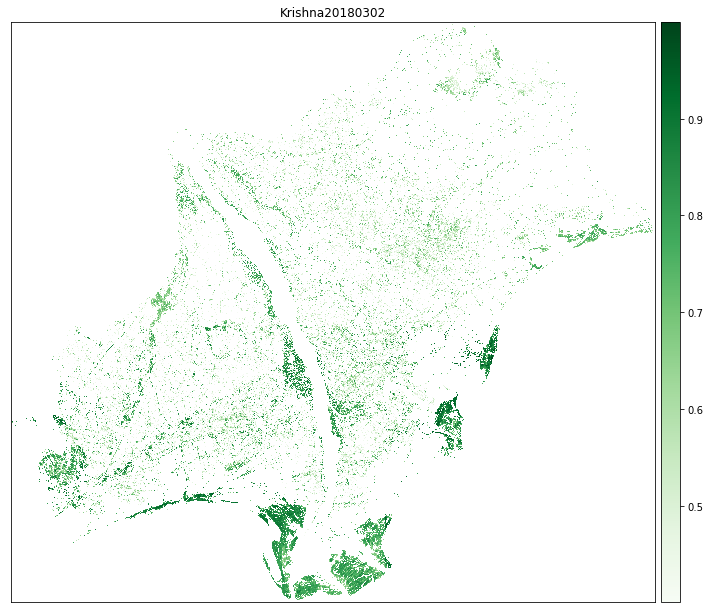

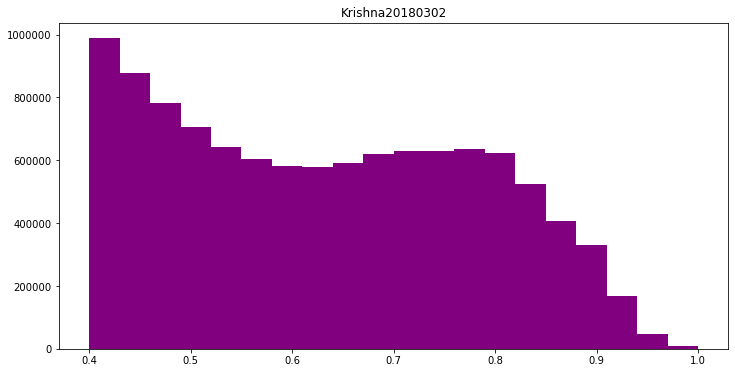

In [22]:
for scene in mar_files:
    date = scene.split('\\')[-1].split('.')[0]
    mar = gdal.Open(scene)
    mar_ndvi = np.array(mar.GetRasterBand(1).ReadAsArray())
    filterNDVI(dec_ndvi, mar_ndvi, date)